In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal

file = 'DailyReturn.csv'
data = pd.read_csv(file)
returns_data = data.values

Covariance Matrix for λ = 0.8:
 [[ 4.77589227e-05  1.80777502e-05  4.79460277e-05 ...  5.68215072e-05
   5.97427094e-05  3.28392189e-05]
 [ 1.80777502e-05  6.93452586e-05  3.39918871e-05 ...  5.51114416e-05
   1.76960182e-05 -1.19538922e-05]
 [ 4.79460277e-05  3.39918871e-05  7.68612696e-05 ...  4.37213332e-05
   3.33875107e-05  6.22931380e-06]
 ...
 [ 5.68215072e-05  5.51114416e-05  4.37213332e-05 ...  1.60530826e-04
   1.27496792e-04  5.17866206e-05]
 [ 5.97427094e-05  1.76960182e-05  3.33875107e-05 ...  1.27496792e-04
   1.89320855e-04  1.66278038e-05]
 [ 3.28392189e-05 -1.19538922e-05  6.22931380e-06 ...  5.17866206e-05
   1.66278038e-05  2.39850502e-04]]
Eigenvalues:
 [8.95559335e-03 2.22535487e-03 1.73341659e-03 1.43667228e-03
 9.94641983e-04 7.76857017e-04 4.90545956e-04 4.38399036e-04
 4.00034573e-04 2.78307436e-04 2.48728141e-04 2.10519865e-04
 1.93552566e-04 1.36331045e-04 1.24741932e-04 8.80947230e-05
 7.40273695e-05 6.40624728e-05 5.13128827e-05 4.42194306e-05
 4.13619644e-

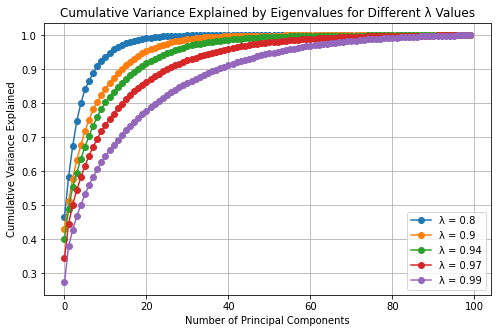

In [35]:
# Step 1: Manual Calculation of Exponentially Weighted Covariance Matrix
def manually_weighted_cov_matrix(returns, lambd):
    T, N = returns.shape
    cov_matrix = np.zeros((N, N))

    weights = np.array([(1 - lambd) * lambd**(T - t - 1) for t in range(T)])
    weights /= weights.sum()

    mean_returns = np.average(returns, axis=0, weights=weights)

    for i in range(T):
        diff = (returns[i, :] - mean_returns).reshape(-1, 1)
        cov_matrix += weights[i] * (diff @ diff.T)

    print(f"Covariance Matrix for λ = {lambd}:\n", cov_matrix)
    return cov_matrix, mean_returns

# Step 2: Modified Plotting to combine charts into one plot
def plot_cumulative_variance_combined(eigvals_dict):
    plt.figure(figsize=(8, 5))
    
    for lambd, eigvals in eigvals_dict.items():
        cumulative_variance = np.cumsum(eigvals) / np.sum(eigvals)
        plt.plot(cumulative_variance, marker='o', label=f'λ = {lambd}')
    
    plt.title('Cumulative Variance Explained by Eigenvalues for Different λ Values')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.grid(True)
    plt.legend()
    plt.show()

# Step 3: PCA
def manual_pca(cov_matrix):
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)
    eigvals = eigvals[::-1]
    eigvecs = eigvecs[:, ::-1]
    
    print("Eigenvalues:\n", eigvals)
    print("Eigenvectors:\n", eigvecs)
    return eigvals, eigvecs

# Step 4: Monte Carlo Simulation for Covariance Matrix
def monte_carlo_simulation(cov_matrix, mean_returns, num_simulations=1000):
    N = cov_matrix.shape[0]
    L = np.linalg.cholesky(cov_matrix)
    
    Z = np.random.normal(size=(N, num_simulations))
    simulated_returns = L @ Z + mean_returns[:, np.newaxis]
    
    print(f"Simulated Returns (first 5) for λ:\n", simulated_returns[:5, :5])
    
    return simulated_returns

# Step 5: Simulation for Varying λ Values
def run_full_simulation(returns_data, lambd_values):
    eigvals_dict = {}
    for lambd in lambd_values:
        cov_matrix, mean_returns = manually_weighted_cov_matrix(returns_data, lambd)
        
        eigvals, eigvecs = manual_pca(cov_matrix)
        eigvals_dict[lambd] = eigvals
        
        simulated_returns = monte_carlo_simulation(cov_matrix, mean_returns)
    
    plot_cumulative_variance_combined(eigvals_dict)

lambd_values = [0.8, 0.9, 0.94, 0.97, 0.99]
run_full_simulation(returns_data, lambd_values)